### **Lagged regressors é mais uma informção que pode ser adicionada a previsão para ter ainda mais acuracia sobre as previsões futuras, com o paramentro add_lagged_regressor("temperature") e especificando a coluna que tem relação obtemos um residuo ainda mais acurado e assim poderemos aumentar o n_lags e obter uma melhor previsão.negrito**

In [ ]:
!pip uninstall -y torch notebook notebook_shim tensorflow tensorflow-datasets prophet torchaudio torchdata torchtext torchvision

!pip install neuralprophet


In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

In [ ]:
# Load the dataset for tutorial 4 with the extra temperature column
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial04.csv")
df.head()

,ds,y,temperature
0,2015-01-01,64.92,277.00
1,2015-01-02,58.46,277.95
2,2015-01-03,63.35,278.83
3,2015-01-04,50.54,279.64
4,2015-01-05,64.89,279.05


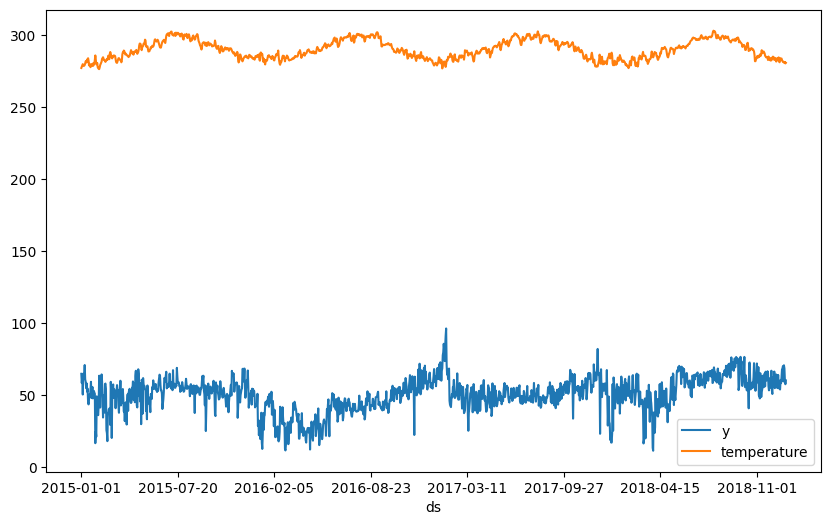

In [ ]:
fig = df.plot(x="ds", y=["y", "temperature"], figsize=(10,6))

In [ ]:
# Disable logging messages unless there is an error
set_log_level("ERROR")

# Model and prediction
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=10,
    # Disable seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    # Add the autogression
    n_lags=10,
)

m.set_plotting_backend("plotly")

# Add the new lagged regressor
m.add_lagged_regressor("temperature")

# Continue training the model and making a prediction
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast, figsize=(16,8))

In [ ]:
m.plot_components(forecast, components=["lagged_regressors"])

In [ ]:
m.plot_parameters(components=["lagged_regressors"])

In [ ]:
metrics

,MAE,RMSE,Loss,RegLoss,epoch
0,94.004128,110.570511,0.895560,0.0,0
1,89.911484,106.025009,0.845763,0.0,1
2,85.679832,101.585876,0.793517,0.0,2
3,80.401421,95.684601,0.728333,0.0,3
4,73.879143,88.356873,0.647420,0.0,4
...,...,...,...,...,...
168,5.098447,6.662680,0.005465,0.0,168
169,5.100644,6.727526,0.005490,0.0,169
170,5.084743,6.711829,0.005462,0.0,170
171,5.118186,6.733142,0.005510,0.0,171


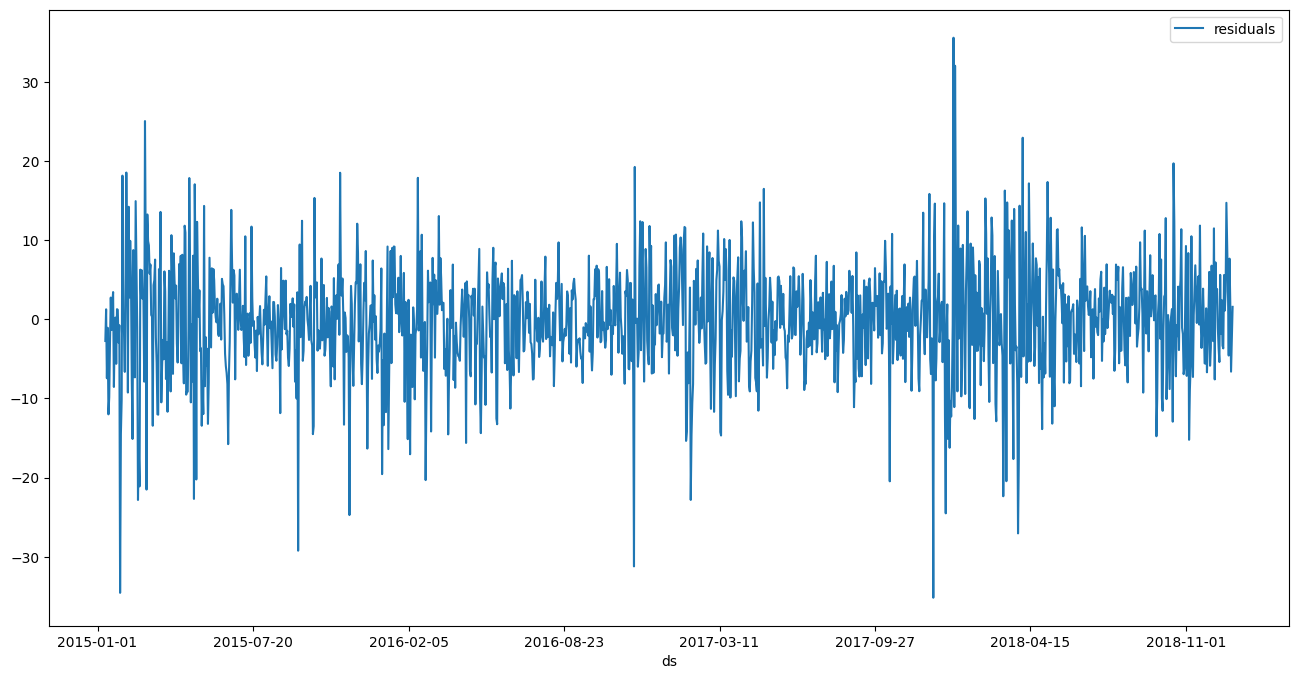

In [ ]:
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(16, 8))